# Data Augmentation To Address Overfitting In Flower Classification CNN

---



**In this notebook we will build a CNN to classify images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rorations, change in contrast etc**


Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

![](https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/0981fe55db7a7abf19ff1d852d9a59153289641e/17_data_augmentation/daisy2.JPG)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin= dataset_url, extract= True, cache_dir = '.', cache_subdir= 'datasets')
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 3s 0us/step


In [3]:
data_dir

PosixPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/6606815161_3c4372760f.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/27466794_57e4fe5656.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/58636535_bc53ef0a21_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5967284308_85714d8cf7_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5293283002_9b17f085f7_m.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'),
 PosixPath('datasets/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4654893119_45d232016b.jpg'),
 PosixPath('datasets/flower_photos/roses/15750320284_22ef21c682.jpg'),
 PosixPath('datasets/flower_photos/roses/15104537437_f6730b38c3_n.jpg')]

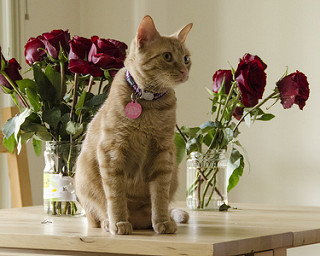

In [7]:
PIL.Image.open(str(roses[1]))

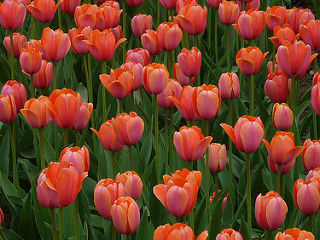

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

# Read flowers images from disk into numpy array using opencv

In [9]:
flowers_image_dict = {
  'roses': list(data_dir.glob('roses/*')),
  'daily': list(data_dir.glob('daily/*')),
  'dandelion': list(data_dir.glob('dandelion/*')),
  'sunflowers': list(data_dir.glob('sunflowers/*')),
  'tulips': list(data_dir.glob('tulips/*'))
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daily': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [11]:
flowers_image_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'),
 PosixPath('datasets/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4654893119_45d232016b.jpg'),
 PosixPath('datasets/flower_photos/roses/15750320284_22ef21c682.jpg'),
 PosixPath('datasets/flower_photos/roses/15104537437_f6730b38c3_n.jpg')]

In [12]:
str(flowers_image_dict['roses'][0])

'datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'

In [13]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))

In [14]:
img.shape

(333, 500, 3)

In [15]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [16]:
X = np.array(X)
y = np.array(y)

# Train test split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=142)

In [18]:
X_train.shape

(2277, 180, 180, 3)

In [19]:
y_train.shape

(2277,)

# Preprocessing: scale images

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Build convolutional neural network and train it

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding= 'same', activation= 'relu', input_shape=(180,180,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding= 'same', activation= 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation= 'relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

model.compile(
  optimizer = 'adam',
  loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
  metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs= 30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


72/72 [==============================] - 7s 24ms/step - loss: 1.0881 - accuracy: 0.5354
Epoch 2/30
72/72 [==============================] - 1s 20ms/step - loss: 0.8185 - accuracy: 0.6583
Epoch 3/30
72/72 [==============================] - 1s 19ms/step - loss: 0.6867 - accuracy: 0.7242
Epoch 4/30
72/72 [==============================] - 1s 20ms/step - loss: 0.5561 - accuracy: 0.7896
Epoch 5/30
72/72 [==============================] - 1s 20ms/step - loss: 0.4009 - accuracy: 0.8573
Epoch 6/30
72/72 [==============================] - 1s 20ms/step - loss: 0.2620 - accuracy: 0.9113
Epoch 7/30
72/72 [==============================] - 2s 23ms/step - loss: 0.1277 - accuracy: 0.9587
Epoch 8/30
72/72 [==============================] - 2s 21ms/step - loss: 0.1157 - accuracy: 0.9653
Epoch 9/30
72/72 [==============================] - 1s 20ms/step - loss: 0.0388 - accuracy: 0.9908
Epoch 10/30
72/72 [==============================] - 1s 20ms/step - loss: 0.0450 - accuracy: 0.9877
Epoch 11/30
72/72 [=

In [22]:
model.evaluate(X_test_scaled,y_test)

 5/24 [=====>........................] - ETA: 0s - loss: 2.2775 - accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - 1s 25ms/step - loss: 2.7477 - accuracy: 0.6724


[2.7476823329925537, 0.6723684072494507]

Here we see that while train accuracy is very high (100%), the test accuracy is significantly low(67%) indicating overfiting. Let's make some predictions before we use data augmentation to address overfitting

In [24]:
predictions = model.predict(X_test_scaled)
predictions

24/24 [==============================] - 0s 13ms/step


array([[3.2414170e-04, 7.1506960e-18, 5.1157258e-07, 9.9571252e-01,
        3.9628656e-03],
       [1.2518097e-11, 3.1516158e-29, 7.0171446e-08, 3.2411465e-13,
        9.9999988e-01],
       [8.1343973e-01, 4.4579576e-18, 6.5249238e-05, 1.7215025e-01,
        1.4344733e-02],
       ...,
       [2.9839422e-03, 7.8865755e-15, 1.9362028e-03, 3.6516714e-01,
        6.2991273e-01],
       [1.2937571e-08, 4.7395041e-30, 2.2371514e-05, 9.9891865e-01,
        1.0590245e-03],
       [5.6260617e-08, 7.6479996e-25, 9.8991042e-01, 2.2971280e-06,
        1.0087349e-02]], dtype=float32)

In [28]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)

3

In [27]:
y_test[0]

3

# Improve Test Accuracy Using Data Augmentation

In [33]:
data_augmentation = keras.Sequential([
  layers.experimental.preprocessing.RandomFlip('horizontal', input_shape= (180,180,3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1)
])

## Original Image

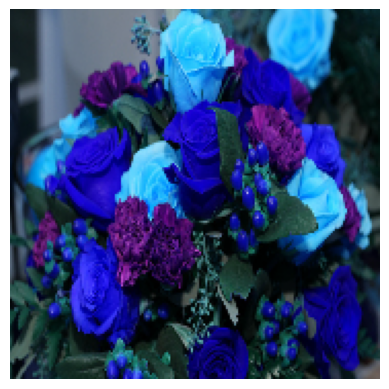

In [40]:
plt.axis('off')
plt.imshow(X[0])
plt.show()

## Newly generated training sample using data augmentation

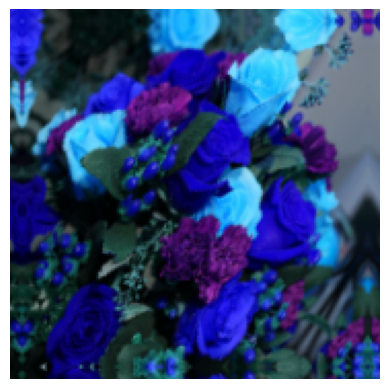

In [42]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
plt.show()

# Train the model using data augmentation and a drop out layer

In [44]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding= 'same', activation= 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding= 'same', activation= 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation= 'relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

model.compile(
  optimizer = 'adam',
  loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
  metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs= 30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


72/72 [==============================] - 5s 30ms/step - loss: 1.3272 - accuracy: 0.4343
Epoch 2/30
72/72 [==============================] - 2s 22ms/step - loss: 0.8988 - accuracy: 0.6223
Epoch 3/30
72/72 [==============================] - 2s 22ms/step - loss: 0.8028 - accuracy: 0.6561
Epoch 4/30
72/72 [==============================] - 2s 22ms/step - loss: 0.7662 - accuracy: 0.6781
Epoch 5/30
72/72 [==============================] - 2s 22ms/step - loss: 0.7370 - accuracy: 0.7018
Epoch 6/30
72/72 [==============================] - 2s 22ms/step - loss: 0.6917 - accuracy: 0.7189
Epoch 7/30
72/72 [==============================] - 2s 24ms/step - loss: 0.6614 - accuracy: 0.7238
Epoch 8/30
72/72 [==============================] - 2s 25ms/step - loss: 0.6494 - accuracy: 0.7396
Epoch 9/30
72/72 [==============================] - 2s 22ms/step - loss: 0.6413 - accuracy: 0.7440
Epoch 10/30
72/72 [==============================] - 2s 22ms/step - loss: 0.6392 - accuracy: 0.7347
Epoch 11/30
72/72 [=

In [46]:
model.evaluate(X_test_scaled, y_test)

 1/24 [>.............................] - ETA: 5s - loss: 0.7717 - accuracy: 0.7188

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - 1s 13ms/step - loss: 0.7474 - accuracy: 0.7342


[0.7473587989807129, 0.7342105507850647]

**You can see that by using data augmentation and drop out layers the accuracy of test set predictions is increased to 73%**
